Question 2
What is the relationship between contract duration & annual salary? 

In [256]:
import pandas as pd
from utils import data_pre, count_nan_values
import re


In [257]:
df = pd.DataFrame()
df = data_pre(df)

['Startup' 'Product' nan 'Consulting / Agency' 'Bodyshop / Outsource'
 'University' 'Bank' 'Outsource']


In [258]:
contract_salary = df[['Contract_Duration','Salary']].dropna()


Salary statistics

In [259]:
print(contract_salary.head(5))

    Contract_Duration    Salary
0  unlimited contract   80000.0
1  unlimited contract   80000.0
2  temporary contract  120000.0
3  unlimited contract   54000.0
4  unlimited contract   62000.0


Salaries are all in Euro, no need to unify the currency . we will use it directly

In [260]:
print("There are",count_nan_values(df,'Salary'),"missing salary/ies")

There are 0 missing salary/ies


No missing data for the salary column, no need to impute.

In [261]:
# compute mean, median, and standard deviation of a column
mean_salary = contract_salary['Salary'].astype(float).mean()
median_salary = contract_salary['Salary'].astype(float).median()
std_salary = contract_salary['Salary'].astype(float).std()
max_salary = contract_salary['Salary'].astype(float).max()
min_salary = contract_salary['Salary'].astype(float).min()

# display the computed statistics
print('Mean salary: ', mean_salary)
print('Median salary: ', median_salary)
print('Standard deviation of salary: ', std_salary)
print('Max salary: ', max_salary)
print('Min salary: ', min_salary)


Mean salary:  44878054.81102541
Median salary:  70000.0
Standard deviation of salary:  2111492333.8801577
Max salary:  99999999999.0
Min salary:  6000.0


In [262]:
contract_salary = contract_salary[contract_salary['Salary'] != 'nan']
contract_salary['Salary'] = contract_salary['Salary'].astype('float64')
contract_salary['Salary'] = contract_salary['Salary'].astype('int64')

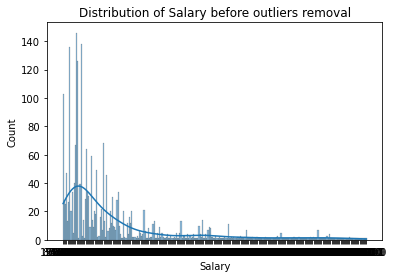

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df['Salary'], kde=True, binwidth=10000)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salary before outliers removal')
plt.show()

1-Expectation :
I guess the mean of the annaual salary of an IT engineer in Germany is around 50-60k in euors as Google says so.

2-After collecting:
The data says that the mean of salaries is 4487k, but median is 70k 

3-Comparing Data and expectations:
the median is not much far from the expected mean, but the mean is much more larger than the expected.
As we know it, mean is sensitive to outliers .Let's remove outliers and double-check.

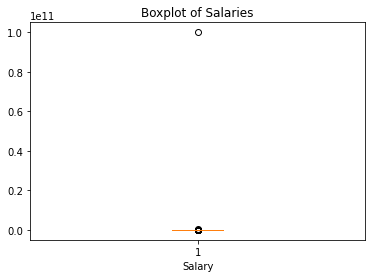

In [264]:
# plot boxplot
plt.boxplot(contract_salary['Salary'])
plt.xlabel('Salary')
plt.title('Boxplot of Salaries')
plt.show()

There are outliers 

In [265]:
# calculate the first and third quartiles of column Salary
# contract_salary = contract_salary[contract_salary['Salary'].astype('float64').dropna().astype('int64')]

salary_df = contract_salary['Salary']
q1 = salary_df.quantile(0.25)
q3 = salary_df.quantile(0.75)
iqr = q3 - q1
print('First quad of Salaries=',q1)
print('Third quad of Salaries=',q3)
print('IQR of Salaries=',iqr)
# remove rows where the value is less than q1 - 1.5*iqr or greater than q3 + 1.5*iqr
contract_salary = contract_salary[(contract_salary['Salary'] >= (q1 - 2 * iqr)) & (contract_salary['Salary'] <= (q3 +2 * iqr))]
# # # display the dataframe without outliers
print('#of valid Salaries with outliers:',len(salary_df))
print('#of valid Salaries WITHOUT outliers:',len(contract_salary))

First quad of Salaries= 60000.0
Third quad of Salaries= 80000.0
IQR of Salaries= 20000.0
#of valid Salaries with outliers: 2243
#of valid Salaries WITHOUT outliers: 2156


There are around 160 outlier value that affects the analysis, if we use the range of non-outliers as q1-2 * iqr and q3+ 2* iqr, it results in less outliers (80 instead of 160) as our data isn't huge so we need to keep as much useful data as possible .
I'd prefer to remove this range them to deal with realistic values.

In [266]:
mean_salary = contract_salary['Salary'].mean()
median_salary = contract_salary['Salary'].median()
std_salary = contract_salary['Salary'].std()
max_salary = contract_salary['Salary'].max()
min_salary = contract_salary['Salary'].min()

# display the computed statistics
print('Mean salary: ',mean_salary)
print('Median salary: ', median_salary)
print('Standard deviation of salary: ', std_salary)
print('Max salary: ', max_salary)
print('Min salary: ', min_salary)

Mean salary:  69627.07421150278
Median salary:  69000.0
Standard deviation of salary:  17888.92420162467
Max salary:  120000
Min salary:  20000


Now Expectation meets the reality,
As expected the outliers affected the mean heavly, so after removing them we can see that the mean and median are close to each other and to what we expected .

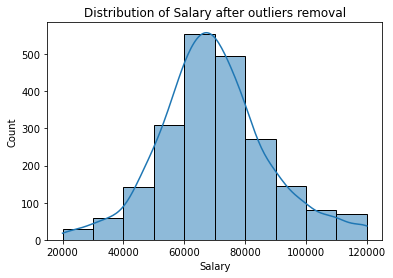

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=contract_salary['Salary'], kde=True, binwidth=10000)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salary after outliers removal')
plt.show()

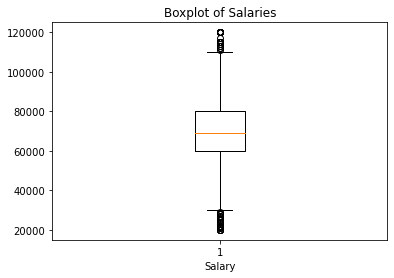

In [268]:
# plot boxplot
plt.boxplot(contract_salary['Salary'])
plt.xlabel('Salary')
plt.title('Boxplot of Salaries')
plt.show()

Contract duration

To know the different categories of duration:

In [269]:
unique_duration = contract_salary['Contract_Duration'].unique()
print("There is",len(unique_duration))
print("The categories are:",unique_duration)

There is 9
The categories are: ['unlimited contract' 'temporary contract' 'nan' 'unlimited' '6 months'
 'more than 1 year' '1 year' 'less than 3 months' '3 months']


There are missing (nan) values that need to be processed

In [270]:
null = len(contract_salary[(contract_salary['Contract_Duration'] == 'nan')])
print("There are ",null,"missing values in duration")

There are  45 missing values in duration


In [271]:
def clean_contract(df):
    cleaned_df = pd.DataFrame(columns=['Contract_Duration', 'Salary'])
    for _, row in df.iterrows():
        if row['Contract_Duration'] is not None :
            # split string using , / &
            values = re.split("[,&/]", row['Contract_Duration'])
            for value in values:
                # remove leading and trailing spaces
                # change to lower case
                processed_value = value.strip().lower().replace(".", "")
                if ("unlimited" in processed_value):
                    cleaned_df.loc[len(cleaned_df.index)] = ['unlimited', row['Salary']]
                else:
                    cleaned_df.loc[len(cleaned_df.index)] = [processed_value, row['Salary']]
    return cleaned_df

For the missing values, i think it's proper to remove these rows as its a personal choice that we can't impute.

In [272]:
contract_salary = contract_salary[(contract_salary['Contract_Duration'] != 'nan')]


unify the categories as (unlimited) and (unlimited contract )are the same 

In [273]:
contract_salary= clean_contract(contract_salary)
unique_duration = contract_salary['Contract_Duration'].unique()
print("There is",len(unique_duration))
print("The categories are:",unique_duration)

There is 7
The categories are: ['unlimited' 'temporary contract' '6 months' 'more than 1 year' '1 year'
 'less than 3 months' '3 months']


In [274]:
mode_duration = contract_salary['Contract_Duration'].mode()
# display the computed statistics
print('Mode duration: ',mode_duration)

Mode duration:  0    unlimited
Name: Contract_Duration, dtype: object


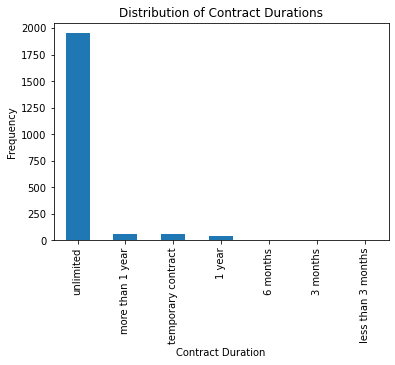

unlimited             1952
more than 1 year        58
temporary contract      54
1 year                  38
6 months                 6
3 months                 2
less than 3 months       1
Name: Contract_Duration, dtype: int64


In [276]:
# count the frequency of each category
duration_counts = contract_salary['Contract_Duration'].value_counts()
# plot bar chart
duration_counts.plot(kind='bar')
plt.xlabel('Contract Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Durations')
plt.show()
category_counts = contract_salary['Contract_Duration'].value_counts(normalize=False)

print(category_counts)

1-Expectation :
After searching i found that,The most common contract duration in Germany is unlimited.

2-After collecting:
The data says that most frequent category is the unlimited . 

3-Comparing Data and expectations:
We found what we are expecting.

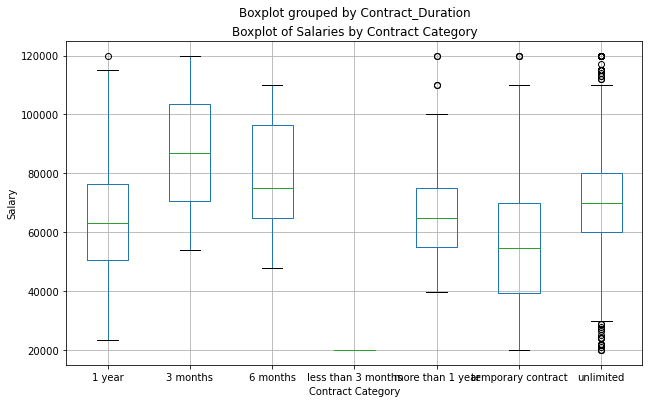

In [254]:
# plot boxplots by contract category
contract_salary.boxplot(column='Salary', by='Contract_Duration', figsize=(10,6))
plt.xlabel('Contract Category')
plt.ylabel('Salary')
plt.title('Boxplot of Salaries by Contract Category')
plt.show()

In [277]:
# calculate mean salary for each contract category
category_means = contract_salary.groupby('Contract_Duration')['Salary'].mean()

print(category_means)

Contract_Duration
1 year                64578.947368
3 months              87000.000000
6 months              78833.333333
less than 3 months    20000.000000
more than 1 year      67289.655172
temporary contract    58687.407407
unlimited             69835.676742
Name: Salary, dtype: float64


1-Expectation :
I think there is no relationship between salary and the contract duration , as salary there is nothing for company/employee to prefer one contract to another.

2-After collecting:
The data says that most frequent category is the unlimited . 

3-Comparing Data and expectations:
We found what we are expecting.